# ÂæÆË∞É

## ÂØºÂÖ•Âü∫Êú¨ÂåÖ

In [1]:
%matplotlib inline

import os
import torch
import torchvision
from torch import nn
import d2l_torch as d2l

## Êï∞ÊçÆÈõÜ

‰ªéÁΩë‰∏äÂºÑÂæó‰∏Ä‰∏™Êï∞ÊçÆÈõÜÔºåÁÉ≠ÁãóÔºàÁÅ´ËÖøËÇ†Ôºâ
+ ‰∏ãËΩΩÈìæÊé•Ôºö< http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip>
+ Â¶ÇÊûú‰∏ãËΩΩÈÄüÂ∫¶ÊÖ¢ÁöÑËØùÔºåÁõ¥Êé•ËøÖÈõ∑ÊàñËÄÖÊµèËßàÂô®‰∏ãËΩΩÂêß

In [2]:
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL + 'hotdog.zip',
                          'fba480ffa8aa7e0febbb511d181409f899b9baa5')

data_dir = d2l.download_extract('hotdog')

In [3]:
train_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'))
test_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'))

`ImageFolder`ÈÄÇÂêà‰ª•Êñá‰ª∂Â§π‰∏∫Âçï‰ΩçÁªÑÁªáÁöÑÂõæÁâáÔºå
+ ÊØîÂ¶ÇÔºö`root/dog/xxx.png`ÊàñËÄÖÊòØ`root/cat/123.png`ÔºåÊàñËÄÖÊòØÊñá‰ª∂Â§π‰∏ãÈù¢ÁöÑÂ≠êÊñá‰ª∂Â§πÁöÑÂõæÁâáÔºå`root/dog/[...]/xxz.png`
+ ÊàñËÄÖ‰∏äÈù¢‰ª£Á†ÅÊòØÔºö
    + `./data/hotdog/test/hotdog`Âíå`./data/hotdog/test/not-hotdog`Ôºå‰ª•Âèä
    + `./data/hotdog/train/hotdog`Âíå`./data/hotdog/train/not-hotdog`

+ ÊâÄ‰ª•ËøôÂÖ∂ÂÆûÊòØ‰∏™ÂàÜÁ±ªÈóÆÈ¢òÔºåÊòØ**ÁÉ≠ÁãóÂõæÁâá**ÔºåËøòÊòØ**‰∏çÊòØÁÉ≠ÁãóÂõæÁâá**
+ ‰∏çÊòØÁõÆÊ†áÊ£ÄÊµãÈóÆÈ¢òÔºåÂ¶ÇÊûúÊòØÁõÆÊ†áÊ£ÄÊµãÁöÑËØùÔºåËøò‰ºöÊúâxmlÊàñËÄÖÂÖ∂ÂÆÉÊ†áËÆ∞‰ΩçÁΩÆ‰ø°ÊÅØÁöÑÊñá‰ª∂

## Êü•ÁúãÊï∞ÊçÆÈõÜ

In [4]:
train_imgs[1]

(<PIL.Image.Image image mode=RGB size=155x98 at 0x1DEB8C773C8>, 0)

**Ê≥®ÊÑè**Ôºö
+ `/train/`Êñá‰ª∂Â§π‰∏≠ÂåÖÂê´`hotdog`Âíå`not-hotdog`‰∏§‰∏™Êñá‰ª∂Â§π
+ ÊâÄ‰ª•ImageFolder‰ºöÈÄê‰∏™ËØªÂèñËøô‰∏§‰∏™Êñá‰ª∂Â§π‰∏≠ÁöÑÂõæÁâáÔºåÂç≥‰ªé1ÂºÄÂßãÂà∞1000ÔºåÊòØhotdogÂõæÁâáÔºå‰ªé1001Âà∞2000ÊòØnot-hotdog„ÄÇ
+ ‰πüÂ∞±ÊòØÊ≠£ÁùÄÊï∞Ââç1kÂº†ÂõæÊòØÁÉ≠ÁãóÔºåÂÄíÁùÄÊï∞Ââç1kÂº†ÂõæÊòØ ÈùûÁÉ≠Áãó

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEB99B2808>,
      dtype=object)

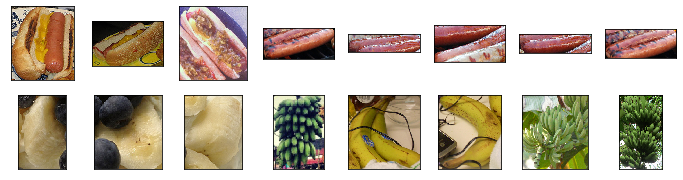

In [6]:
hotdogs=[train_imgs[i][0] for i in range(8)]
not_hotdogs=[train_imgs[-i-1][0] for i in range(8)]
d2l.show_images(hotdogs+not_hotdogs,2,8)

In [9]:
hotdogs=[train_imgs[i][0] for i in range(8)]
not_hotdogs=[train_imgs[1992+i][0] for i in range(8)]
d2l.show_images(hotdogs+not_hotdogs,2,8)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEBD2A9148>,
      dtype=object)

ÂèØ‰ª•ÁúãÂà∞ÔºåÂÖ∂ÂÆûÊïàÊûúÂ∑Æ‰∏çÂ§öÔºåÂè™‰∏çËøá‰∏äÈù¢ÊòØnot-hotdogÂÄíËøáÊù•‰∫Ü„ÄÇ

‰∫åÂàÜÁ±ªÔºö
+ Ê≠£‰æãÂ∞±ÊòØÔºöÁÉ≠Áãó
+ Ë¥ü‰æãÂ∞±ÊòØÔºöÈùûÁÉ≠ÁãóÔºåÊØîÂ¶Ç‰∏Ä‰∫õÂíåÁÉ≠ÁãóÊúâÁÇπÁõ∏‰ººÁöÑ‰∏úË•øÔºöÈ¶ôËïâÔºàÁªøËâ≤ÊàñËÄÖÈªÑËâ≤ÁöÑÔºâÔºåÊàñËÄÖÊòØÂâ•‰∫ÜÁöÆÁöÑÈ¶ôËïâ

ÂõæÂÉèË¥®ÈáèÔºö
+ ÈïøÂÆΩÊØîÂ∑ÆË∑ùÂæàÂ§ßÔºå
+ ÂõæÂÉè‰∏≠È¶ôËÇ†Âç†ÊØî‰πü‰∏çÂêå
+ ÂõæÂÉèÂ§ßÂ∞èÂ∑ÆË∑ù‰πüÂæàÂ§ß

## ËÆ°ÁÆóÁÉ≠ÁãóÊï∞ÊçÆÈõÜÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ

In [20]:
augs=torchvision.transforms.ToTensor()
augs(train_imgs[1][0])

tensor([[[0.0078, 0.0078, 0.0039,  ..., 0.3765, 0.2549, 0.2078],
         [0.0039, 0.0039, 0.0039,  ..., 0.2000, 0.2392, 0.3137],
         [0.0039, 0.0039, 0.0039,  ..., 0.0275, 0.0784, 0.3137],
         ...,
         [0.6431, 0.6510, 0.6471,  ..., 0.3765, 0.3725, 0.3608],
         [0.6275, 0.6392, 0.6431,  ..., 0.3176, 0.3216, 0.3529],
         [0.6235, 0.6275, 0.6392,  ..., 0.2980, 0.3216, 0.2392]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.3686, 0.2314, 0.1608],
         [0.0039, 0.0039, 0.0039,  ..., 0.2039, 0.2235, 0.2745],
         [0.0039, 0.0039, 0.0039,  ..., 0.0275, 0.0745, 0.2980],
         ...,
         [0.5725, 0.5765, 0.5765,  ..., 0.3059, 0.3020, 0.2902],
         [0.5529, 0.5608, 0.5647,  ..., 0.2588, 0.2549, 0.2824],
         [0.5451, 0.5490, 0.5529,  ..., 0.2275, 0.2471, 0.1608]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.3216, 0.1765, 0.1059],
         [0.0039, 0.0039, 0.0039,  ..., 0.1804, 0.1804, 0.2275],
         [0.0039, 0.0039, 0.0039,  ..., 0.0196, 0.0549, 0.

In [32]:
augs(train_imgs[1][0])*255

tensor([[[  2.,   2.,   1.,  ...,  96.,  65.,  53.],
         [  1.,   1.,   1.,  ...,  51.,  61.,  80.],
         [  1.,   1.,   1.,  ...,   7.,  20.,  80.],
         ...,
         [164., 166., 165.,  ...,  96.,  95.,  92.],
         [160., 163., 164.,  ...,  81.,  82.,  90.],
         [159., 160., 163.,  ...,  76.,  82.,  61.]],

        [[  2.,   2.,   1.,  ...,  94.,  59.,  41.],
         [  1.,   1.,   1.,  ...,  52.,  57.,  70.],
         [  1.,   1.,   1.,  ...,   7.,  19.,  76.],
         ...,
         [146., 147., 147.,  ...,  78.,  77.,  74.],
         [141., 143., 144.,  ...,  66.,  65.,  72.],
         [139., 140., 141.,  ...,  58.,  63.,  41.]],

        [[  2.,   2.,   1.,  ...,  82.,  45.,  27.],
         [  1.,   1.,   1.,  ...,  46.,  46.,  58.],
         [  1.,   1.,   1.,  ...,   5.,  14.,  65.],
         ...,
         [ 18.,  16.,  13.,  ...,   6.,   5.,   2.],
         [ 10.,  10.,   9.,  ...,   1.,   9.,  22.],
         [  6.,   5.,   6.,  ...,  20.,  33.,  16.]]]

In [38]:
import torch
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
import os

# ÊääÊñá‰ª∂Â§πÂõæÂÉèÊï∞ÊçÆËΩ¨ÊàêTensor
augs=torchvision.transforms.ToTensor()
train_length=len(train_imgs)
train_imgs_tensor=[augs(train_imgs[i][0]) for i in range(train_length)]

# ÊûÑÂª∫dataloader
train_loader = torch.utils.data.DataLoader(train_imgs_tensor, shuffle=False, num_workers=os.cpu_count())


# ÂàõÂª∫‰∏âÈÄöÈÅìÁöÑÂùáÂÄºÂíåÊñπÂ∑ÆÂêëÈáè
mean = torch.zeros(3)
std = torch.zeros(3)

# ÂºÄÂßãËÆ°ÁÆó
for X in train_loader:
    for d in range(3):
        mean[d] += X[:, d, :, :].mean() 
        std[d] += X[:, d, :, :].std()
mean.div_(train_length)
std.div_(train_length)
print(f"ÂùáÂÄº‰∏∫Ôºö{mean}ÔºåÊñπÂ∑Æ‰∏∫Ôºö{std}")

ÂùáÂÄº‰∏∫Ôºötensor([0.5734, 0.4586, 0.2882])ÔºåÊñπÂ∑Æ‰∏∫Ôºötensor([0.2108, 0.2169, 0.1982])


In [30]:
for X in train_loader:
    print(X.shape)
    break

torch.Size([1, 3, 144, 122])


**ÂèØ‰ª•ÁúãÂà∞**
+ ÂùáÂÄº‰∏∫Ôºötensor([0.5734, 0.4586, 0.2882])ÔºåÊñπÂ∑Æ‰∏∫Ôºötensor([0.2108, 0.2169, 0.1982])
+ ÂéüÂßãÁöÑÁÉ≠ÁãóÊï∞ÊçÆÈõÜÁöÑÊï∞ÂÄºËåÉÂõ¥Â∑≤ÁªèÊòØ0-1‰∫ÜÔºåËÆ°ÁÆóÂæóÂà∞ÁöÑÂùáÂÄºÂíåÊñπÂ∑ÆÂÖ∂ÂÆûÂíåImageNetÁöÑÊàñËÄÖCOCOÁöÑËøòÊòØÊúâÊé•Ëøë‰πãÂ§ÑÁöÑ
+ ÁªìÂêàCSDNÊñáÁ´†Ôºö[ËÆ°ÁÆóÂõæÂÉèÊï∞ÊçÆÈõÜÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ(mean, std)Áî®‰∫étransforms.Normalize()Ê†áÂáÜÂåñ](https://blog.csdn.net/PanYHHH/article/details/107896526)
    + ËøôÈáåÁî®cifar10‰Ωú‰∏∫Á§∫‰æã
    + ÊàëÁúã‰∫Ü36.Êï∞ÊçÆÂ¢ûÂº∫‰∏≠ cifar10ÁöÑÊï∞ÊçÆÈõÜÔºåÊï∞ÂÄºËåÉÂõ¥‰πüÂ∑≤ÁªèË¢´Áº©ÊîæÂà∞0-1‰∫Ü
+ üëç**ÊâÄ‰ª•ÂõæÂÉèÊï∞ÊçÆÈõÜÂùáÂÄºÂíåÊñπÂ∑ÆÁöÑËÆ°ÁÆóÊòØÂú®Â∑≤ÁªèÁº©ÊîæÂà∞0-1‰πãÈó¥ÁöÑÂü∫Á°Ä‰∏äÔºüÔºü**
    + Â∞ùËØïËøá‰πò‰ª•255ÔºåÁªìÊûú‰ºöÈùûÂ∏∏Â§ß„ÄÇÂùáÂÄºÂèòÂ§ßÔºåÊñπÂ∑Æ‰πü‰ºöÂæàÂ§ßÔºàÂá†ÁôæÁöÑÊ†∑Â≠êÔºâ

imagenetÁöÑ RGBÊ®°Âºè

              stdÊ†áÂáÜÂ∑ÆÔºö[0.229, 0.224, 0.225]

              meanÂùáÂÄºÔºö[0.485, 0.456, 0.406]

COCOÁöÑRGBÊ®°Âºè„ÄêÂæàÂ∞ëÁî®„Äë

              stdÊ†áÂáÜÂ∑ÆÔºö [0.234, 0.239, 0.242]

              meanÂùáÂÄºÔºö[0.471, 0.448, 0.408]

## ÂõæÂÉèÂ¢ûÂπø

Âõ†‰∏∫‰ΩøÁî®ÁöÑÊòØImageNetÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºåÊâÄ‰ª•Êï∞ÊçÆÂ¢ûÂº∫‰πüË¶ÅÂíå‰∫∫ÂÆ∂‰∏ÄËá¥

ÂØπ‰∫é`train_augs`
+ ImageNetÁöÑÊï∞ÊçÆÂùáÂÄºÂíåÊñπÂ∑ÆÂ∞±ÊòØ‰∏ãÈù¢Ëøô‰∏™ÂÄºÔºåÊúâÈó≤ÊÉÖÁöÑËØùÂèØ‰ª•ÁÆó‰∏ÄÈÅç„ÄÇ„ÄÇ„ÄÇ
+ ‰ΩøÁî®ÈöèÊú∫ÈááÈõÜÔºåÂêåÊó∂resizeÂà∞224ÔºåÁÉ≠ÁãóÊï∞ÊçÆÈõÜÂÖ∂ÂÆûÂ§ßÂ∞èÂ∑ÆË∑ùËøòÊå∫Â§ßÔºåËøôÈáåÁõ¥Êé•ÈÉΩresizeÊàê224\*224ÔºåÂíåImageNet‰∏ÄËá¥„ÄÇ„ÄÇÔºàÈÉΩÊòØ‰∏∫‰∫ÜÈÄÇÂ∫îÈÇ£‰∏™È¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºâ
+ Áî®‰∏Ä‰∏™Ê∞¥Âπ≥ÁøªËΩ¨ÔºåÁÉ≠ÁãóËøô‰∏™Áâ©‰ΩìÁøªËΩ¨ÂÖ∂ÂÆûËøòÂ•ΩÔºåÂõ†‰∏∫Êú¨Ë∫´ÊòØ‰∏™ÊØîËæÉÂØπÁß∞ÁöÑ‰∏úË•øÔºåÈªòËÆ§ÁøªËΩ¨Ê¶ÇÁéá0.5

ÂØπ‰∫é`test_augs`
+ Âõ†‰∏∫ËæìÂÖ•ÁöÑÂõæÁâáÂ§ßÂ∞è‰πüÊòØ‰∏çÁ°ÆÂÆöÁöÑÔºåËæìÂÖ•‰∏Ä‰∏™ÂÄºÁöÑËØùÔºåÂ∞±ÊòØÊääÁü≠ËæπÂºÑÊàêËøô‰∏™ÈïøÂ∫¶ÔºåÂè¶‰∏Ä‰∏™ËæπÂú®‰øùÊåÅÈïøÂÆΩÊØîÁöÑÊÉÖÂÜµ‰∏ãÔºåÂéªÂåπÈÖçËøô‰∏™ÂÄº„ÄÇ
+ ÂÖàÂºÑÊàê256ÔºåÂÜçÈöèÊú∫Êåñ‰∏Ä‰∏™Ôºå‰∏çÊòØ‰ªé‰∏≠ÂøÉÊåñÔºåÂ∞±ÊòØÈöè‰æøÊåñ„ÄÇÔºàÂ¶ÇÊûúÂ∏åÊúõ‰ªé‰∏≠Èó¥ÊåñÔºåÂèØ‰ª•ÂéªÈÄÇÂΩìËÆæÁΩÆ‰∏Ä‰∏ãpaddingÔºåËøôÊ†∑Â∞±‰ºöÁõ∏ÂØπÈù†Ëøë‰∏≠ÂøÉÔºâ

In [5]:
normalize=torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_augs=torchvision.transforms.Compose([torchvision.transforms.RandomResizedCrop(224),
                                          torchvision.transforms.RandomHorizontalFlip(),
                                          torchvision.transforms.ToTensor(),
                                          normalize])

test_augs=torchvision.transforms.Compose([torchvision.transforms.Resize(256),
                                         torchvision.transforms.RandomCrop(224),
                                         torchvision.transforms.ToTensor(),
                                         normalize])

## ÂÆö‰πâÂíåÂàùÂßãÂåñÊ®°Âûã

In [9]:
pretrained_net=torchvision.models.resnet18(pretrained=True,progress=True)

+ pretrainedÈªòËÆ§‰∏∫FalseÔºåÂè™‰ºö‰∏ãËΩΩÁΩëÁªúÁªìÊûÑ
+ ‰∏∫trueÁöÑÊó∂ÂÄôÔºåÂàôÈô§‰∫ÜÁΩëÁªúÁªìÊûÑ‰πãÂ§ñÔºåËøò‰ºö‰∏ãËΩΩ ÊùÉÈáçÊñá‰ª∂Ôºå
+ ËÄå‰∏î‰ºöÁõ¥Êé•Âä†ËΩΩÂà∞ÂÜÖÂ≠òÈáåÔºåÂèØ‰ª•Áõ¥Êé•ËÆøÈóÆÊùÉÈáçÂèÇÊï∞Á≠âÁöÑÂÄº

In [43]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

### ÂÆö‰πâfine_tuneÊ®°Âûã

+ ÊúÄÂêé‰∏Ä‰∏™fcÂàÜÁ±ªÂ±ÇÁöÑËæìÂÖ•ÔºåËøòÊòØÂíåÈ¢ÑËÆ≠ÁªÉÊ®°Âûã‰∏ÄÊ†∑
+ ËæìÂá∫‰∏çÂÜçÊòØImageNetÁöÑ1000Á±ªÔºåËÄåÊòØËøô‰∏™ÁÉ≠ÁãóÊï∞ÊçÆÈõÜÁöÑ2Á±ª
+ Âè¶Â§ñÊîπÂÆåÊúÄÂêé‰∏ÄÂ±ÇÁöÑÁªìÊûÑ‰πãÂêéÔºåÊääÂÆÉÁöÑÊùÉÈáçÈöèÊú∫ÂàùÂßãÂåñÔºõÂÖ∂ÂÆÉÂ±ÇËøòÊòØÁõ¥Êé•Áî®pretrainedÊ®°ÂûãËá™Â∏¶ÁöÑÈÇ£‰∫õ

In [4]:
finetune_net=torchvision.models.resnet18(pretrained=True)
finetune_net.fc=nn.Linear(finetune_net.fc.in_features,2) 
nn.init.xavier_uniform_(finetune_net.fc.weight)

Parameter containing:
tensor([[-0.0359,  0.0960,  0.0897,  ...,  0.0467, -0.0362,  0.0204],
        [ 0.0491,  0.1007, -0.0365,  ...,  0.0878, -0.0220,  0.0678]],
       requires_grad=True)

### Êü•ÁúãÊùÉÈáç

In [76]:
named_param=pretrained_net.named_parameters()

In [83]:
next(named_param)[0]  # ÊØèÊ¨°Ë∞ÉÁî®‰ºöÂèñÂá∫‰∏Ä‰∏™ÊùÉÈáçÂèÇÊï∞ÁöÑÂêçÁß∞ÔºåÂíå‰∏ãÈù¢ÁöÑkeysÊòØ‰∏ÄËá¥ÁöÑ

'layer1.0.conv2.weight'

In [52]:
pretrained_net.state_dict().keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn1.num_batches_tracked', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', '

Èöè‰æøÁúã‰∏Ä‰∏™ÊùÉÈáçÔºåÈÉΩÂæàÈïøÔºåÊ≤°ÊúâÈïøÂ∫¶ÊØîËæÉÁü≠ÁöÑ„ÄÇ

In [55]:
pretrained_net.state_dict()['bn1.running_mean']

tensor([ 2.7681e-03, -2.5769e-02,  2.1254e-07, -8.4605e-02,  2.1121e-08,
         4.9691e-04, -2.2408e-02, -1.1582e-07, -4.8239e-03,  2.7507e-07,
         3.9582e-02,  3.1994e-02, -3.7490e-02, -1.3716e-06,  6.6002e-03,
         4.3782e-03,  6.4797e-02,  1.1176e-01,  3.6002e-02, -7.5075e-02,
        -3.8240e-02,  8.4358e-02, -5.2287e-02, -1.1799e-02,  1.3019e-03,
         3.2172e-02, -1.7784e-02, -9.1009e-02,  1.1319e-01, -4.1632e-02,
         8.7302e-03,  2.9693e-02, -7.0502e-02, -3.4847e-03,  1.0977e-01,
        -1.7341e-03, -5.9423e-08,  2.9330e-02, -7.8553e-09,  6.7320e-03,
        -3.7100e-03,  1.6028e-02, -2.7883e-02,  2.6593e-02,  2.8475e-02,
        -1.2735e-01,  4.4617e-02,  2.6329e-02,  2.1454e-08, -1.7045e-02,
        -3.5617e-03, -4.5841e-02,  6.3876e-02,  1.5220e-02, -3.8511e-02,
        -1.6428e-02, -1.6569e-02,  5.6057e-02, -8.0306e-02, -2.6646e-03,
        -4.1718e-02,  1.2611e-01, -4.9237e-02, -1.3261e-02])

In [61]:
pretrained_net.bn1

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

‰∏çËøáÈÇ£‰∫õ`layer4.1.bn2.num_batches_tracked`ËøôÁßçÔºåÊòØÊ≤°ÊúâÂäûÊ≥ïËÆøÈóÆÁöÑÔºå`layer4.1`Ëøô‰∏™Â∫îËØ•ÊòØsubmoduleÂêß„ÄÇ‚ùì‚ùì‚ùì

## ÂæÆË∞ÉÊ®°Âûã

+ `nn.CrossEntropyLoss(reduction="none")` # Êï∞ÊçÆÁÆÄÂåñ ; Êï∞ÊçÆÊï¥ÁêÜÔºåÈªòËÆ§ÊòØÊ±ÇÂá∫ÊçüÂ§±ÁöÑÂùáÂÄºÔºåËøôÈáå‰∏çËøõË°å‰ªª‰ΩïÊìç‰Ωú
+ `torch.optim.SGD`ÈÉ®ÂàÜÔºå
    + Èô§‰∫ÜfcÂ±Ç‰πãÂ§ñÁöÑÂ±ÇÁöÑÂèÇÊï∞ÊòØÁî®1ÂÄçÂ≠¶‰π†ÁéáÔºåfcÂ±ÇÊòØÁî®10ÂÄçÂ≠¶‰π†ÁéáÔºå
    + ÂêåÊó∂Ëøò‰ΩøÁî®‰∫Ül2Ê≠£ÂàôÊù•ÈôêÂà∂ÂèÇÊï∞ËåÉÂõ¥ÔºåÈò≤Ê≠¢ËøáÊãüÂêàÔºå‰πüÂèØ‰ª•ÂÜôÊàê`1e-3`

In [3]:
def train_fine_tuning(net,lr,batch_size=128,num_epochs=5,param_group=True):
    """
    Â§ßÈÉ®ÂàÜÂíå‰πãÂâçÈÉΩÂ∑Æ‰∏çÂ§öÔºå‰∏çËøáÊúâ‰∏Ä‰∏™param_groupÔºåÁî®Êù•Âå∫ÂàÜfcÂ±ÇÂíåÂÖ∂ÂÆÉÂ±ÇÂ≠¶‰π†ÁéáÁöÑÂèÇÊï∞
    ÈùûfcÂ±ÇÊòØÂ∞èÁöÑÂ≠¶‰π†ÁéáÔºåfcÂ±ÇÁöÑÂ≠¶‰π†ÁéáÊòØÂÖ∂ÂÆÉÂ±ÇÁöÑÂ≠¶‰π†ÁéáÁöÑ10ÂÄç
    Âõ†Ê≠§ÈùûfcÂ±ÇÊòØ 1xÔºåËÄåfcÂ±ÇÊòØ10xÔºàË°®Á§∫1ÂÄçÂ≠¶‰π†ÁéáÂíå10ÂÄçÂ≠¶‰π†ÁéáÔºâ
    """
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'),transform=train_augs),
        batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'),transform=test_augs),
        batch_size=batch_size)
    
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none") 
    if param_group:
        params_1x = [param for name, param in net.named_parameters() if name not in ["fc.weight", "fc.bias"]]
        trainer=torch.optim.SGD([{'params': params_1x}, {'params': net.fc.parameters(),'lr': lr * 10}],lr=lr,weight_decay=0.001)
    else:
        trainer=torch.optim.SGD(net.parameters(),lr=lr,weight_decay=0.001)
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,devices)

In [6]:
train_fine_tuning(finetune_net, batch_size=64,lr=5e-5)

loss 0.173, train acc 0.930, test acc 0.931
170.2 examples/sec on [device(type='cuda', index=0)]


+ Áî±‰∫éÊúâËøáÂéªÁöÑÊùÉÈáçÔºàÁâπÂæÅÊèêÂèñÈÉ®ÂàÜÔºâÔºåÊâÄ‰ª•‰∏ÄÂºÄÂßãÂáÜÁ°ÆÁéáÂ∞±ÂæàÈ´ò
+ ËÄå‰∏îÂÖ∂ÂÆûÂà∞‰∫ÜÁ¨¨2‰∏™epochÔºåÂ∞±Â∑≤ÁªèÂæàÂ•ΩÔºåÂèØËÉΩÈÉΩ‰∏çÁî®Ë∑ë5‰∏™epoch„ÄÇ
+ ËÄå‰∏îÊ≤°ÊúâÂæàÊòéÊòæÁöÑËøáÊãüÂêàÁé∞Ë±°ÔºåËÆ≠ÁªÉÂíåÊµãËØïÁªìÊûúÈÉΩ‰∏çÈîô„ÄÇ
    + ÊµãËØïÁ≤æÂ∫¶ËøòÊØîËÆ≠ÁªÉÁ≤æÂ∫¶È´òÔºå
    + ËôΩÁÑ∂ÊòØImageNet‰∏äÁöÑÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºå‰ΩÜÊòØÊàë‰ª¨Â≠¶‰π†ÁéáÁî®ÁöÑÂæàÂ∞èÔºåÊâÄ‰ª•Âü∫Êú¨Ê≤°ÊúâËøáÊãüÂêà

In [10]:
print(5e-5*10)

0.0005


## ÊØîËæÉ

‰∏∫‰∫ÜËøõË°åÊØîËæÉÔºåÁúã‰∏Ä‰∏ã‰∏çÁî®È¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºåÂÖ®ÈÉ®ÈöèÊú∫ÂàùÂßãÂåñÂèÇÊï∞ÔºåÂíåÁî®‰∫ÜÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÂå∫Âà´

In [13]:
torch.cuda.empty_cache()

In [6]:
scratch_net = torchvision.models.resnet18()
scratch_net.fc = nn.Linear(scratch_net.fc.in_features, 2)
train_fine_tuning(scratch_net, batch_size=64,lr=5e-4, param_group=False)

loss 0.393, train acc 0.836, test acc 0.839
172.1 examples/sec on [device(type='cuda', index=0)]


ÂèØ‰ª•ÁúãÂà∞Ôºö
+ ÈöèÊú∫ÂàùÂßãÂåñÔºåÂºÄÂßãÁöÑÂáÜÁ°ÆÁéá‰πü‰πüÂæàÈ´ò„ÄÇ„ÄÇ„ÄÇ„ÄÇÔºàÊâÄ‰ª•ÂáØÊòéÂàùÂßãÂåñÂæàÁâõÈÄºÔºüÔºüÔºüÔºâ,
+ **Âõ†‰∏∫ËøôÊòØ‰∏™‰∫åÂàÜÁ±ªÈóÆÈ¢òÔºåÊ≠£Â∏∏Âü∫Á°ÄÈÉΩÊòØ50%ÁöÑÊ≠£Á°ÆÁ±ªÔºåÁΩëÁªúÁªìÊûÑÂè™Ë¶Å‰∏çÂ§™Â∑ÆÔºåÂÖ∂ÂÆûÈÉΩÊòØ60%Â§öÂáÜÁ°ÆÁéá**
+ ËøôÈáåÂ≠¶‰π†ÁéáÂÖ∂ÂÆûÊúâÁÇπ‰∏çÂÖ¨Âπ≥ÔºåÂ∫îËØ•ÂèØ‰ª•ÂÜçÂ§ß‰∏ÄÁÇπÁöÑÔºåÂõ†‰∏∫‰∏çÊòØÂæÆË∞É‰∫Ü
+ ÈÉΩÊòØÊµãËØïÈõÜÊØîËÆ≠ÁªÉÈõÜÈ´òÔºåÊï∞ÊçÆÂ¢ûÂº∫ËøòÊòØÊúâÁî®ÁöÑ„ÄÇ
+ ÂèØ‰ª•ÁúãÂà∞Ôºå**Áî®‰∫ÜÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºåËÉΩÈ´ò10‰∏™ÁÇπÂ∑Æ‰∏çÂ§ö**

In [10]:
for param in scratch_net.parameters():
    param.requires_grad = False

weight = pretrained_net.fc.weight
hotdog_w = torch.split(weight.data, 1, dim=0)[713]
hotdog_w.shape

torch.Size([1, 512])

ËøôÈÉ®ÂàÜ‰ª£Á†ÅÂú®‰ª£Á†ÅslidesÈáåÊúâÔºå‰ΩÜÊòØÊ≤°ÊúâËÆ≤ÊòØÂπ≤ÂòõÁöÑ„ÄÇÂ§ßÊ¶ÇÂ∞±ÊòØÁúã‰∏Ä‰∏ãÊúÄÂêéÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÂíåËá™Â∑±ËÆ≠ÁªÉÂá∫Êù•ÁöÑÊ®°ÂûãÁöÑÂèÇÊï∞ÂΩ¢Áä∂Âêß

# È™åËØÅ

## ImageNetÊï∞ÊçÆÈõÜÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ

Â∞±ÊòØÈó≤ÁöÑÔºåÂàöÂ•ΩÂÖÖÂàÜÂà©Áî®‰∏Ä‰∏ãËá™Â∑±ÁîµËÑëÁöÑËÆ°ÁÆóËµÑÊ∫êÔºåË∑ë‰∏Ä‰∏ãÂ•Ω‰∫Ü

ÁúãÂà∞Ê≤êÁ•ûÁöÑ‰ª£Á†ÅÔºåÂèØ‰ª•Êúâ‰∏™ÊîπËøõÁâàÊú¨

In [3]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
import os

In [6]:
all_images=torchvision.datasets.ImageNet(root="../data",train=True,download=True) 

RuntimeError: The dataset is no longer publicly accessible. You need to download the archives externally and place them in the root directory.

Ê†πÊçÆÔºö[Pytorch ImageNet dataset](https://stackoverflow.com/questions/60607824/pytorch-imagenet-dataset)
+ Ëøô‰∏™ÈóÆÈ¢ò‰ºº‰πé‰∏ÄÂπ¥ÂâçÂ∞±Âá∫Áé∞‰∫Ü„ÄÇ„ÄÇ„ÄÇÂèØËÉΩÊòØÊó†Ê≥ï‰ΩøÁî®‰∫ÜÔºåÂè™ËÉΩËá™Â∑±ÊèêÂâç‰∏ãÂ•ΩÔºåÊîæÂà∞ÂØπÂ∫îÁöÑÊñá‰ª∂Â§πÈáå„ÄÇ

## CIFAR10Êï∞ÊçÆÈõÜÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ

In [11]:
# ÂÖ∂ÂÆûÂú®ËØªÂèñÊï∞ÊçÆÁöÑÊó∂ÂÄôÔºåÂ∞±ÂèØ‰ª•ËΩ¨Êç¢ÊàêÂº†Èáè
dataset=torchvision.datasets.CIFAR10(root="../data",train=True,transform=torchvision.transforms.ToTensor(),download=True)
dataloader=torch.utils.data.DataLoader(dataset,batch_size=1,num_workers=4)

train_length=len(dataset)
mean = torch.zeros(3)
std = torch.zeros(3)

# ÂºÄÂßãËÆ°ÁÆó
for X, _ in dataloader:
    for d in range(3):
        mean[d] += X[:, d, :, :].mean() 
        std[d] += X[:, d, :, :].std()
mean.div_(train_length)
std.div_(train_length)
print(f"ÂùáÂÄº‰∏∫Ôºö{mean}ÔºåÊñπÂ∑Æ‰∏∫Ôºö{std}")

Files already downloaded and verified
ÂùáÂÄº‰∏∫Ôºötensor([0.4914, 0.4822, 0.4465])ÔºåÊñπÂ∑Æ‰∏∫Ôºötensor([0.2023, 0.1994, 0.2010])


In [19]:
dataset[1][0].shape[0]

3

## ‰ªéÊñá‰ª∂Â§πËØªÂèñÂõæÂÉèÊï∞ÊçÆÈõÜËÆ°ÁÆóÂùáÂÄºÂíåÊñπÂ∑Æ

ÂÖ∂ÂÆû‰πüÂæàÁÆÄÂçïÔºåÂ∞±ÊòØÂà∂‰ΩúdataloaderÁöÑÊó∂ÂÄôÔºåÁ®çÂæÆÊúâÁÇπÂ∑ÆÂà´

In [20]:
import torch
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
import os

def meanAndstd(imageFolder):
    all_images=torchvision.datasets.ImageFolder(imageFolder,transform=torchvision.transforms.ToTensor())
    train_loader = torch.utils.data.DataLoader(all_images, shuffle=False, num_workers=os.cpu_count())
    
    data_length=len(all_images)
    
    channel_num=all_images[1][0].shape[0]
    
    mean=torch.zeros(channel_num)
    std=torch.zeros(channel_num)
    
    for X,_ in train_loader:
        for d in range(channel_num):
            mean[d]+=X[:,d,:,:].mean()
            std[d]+=X[:,d,:,:].std()
    mean.div_(data_length)
    std.div_(data_length)
    print(f"ÂùáÂÄº‰∏∫Ôºö{mean}ÔºåÊñπÂ∑Æ‰∏∫Ôºö{std}") 
    return (mean,std)

In [21]:
hogdog_mean,hotdog_std=meanAndstd("../data/hotdog/train/")

ÂùáÂÄº‰∏∫Ôºötensor([0.5734, 0.4586, 0.2882])ÔºåÊñπÂ∑Æ‰∏∫Ôºötensor([0.2108, 0.2169, 0.1982])
